In [ ]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split

In [ ]:
columns=['id', 'date', 'year','month','officer_race', 'officer_race_percentage','complainant_race','complainant_race_percentage']
df = pd.read_csv('both_percentage_year.csv', names = columns)
df['date'] = pd.to_datetime(df['date'])
df = df.drop_duplicates()

In [ ]:
# plt.figure(figsize=(20,20))
# plt.scatter(df['date'],(df['officer_race_percentage']))

# Start

In [ ]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz


# install findspark using pip
!pip install -q findspark


In [ ]:
# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.sql.types import * 
import pyspark.sql.functions as F
from pyspark.sql.functions import col, asc,desc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyspark.sql import SQLContext
import pandas as pd
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler,StandardScaler
from pyspark.ml import Pipeline
from sklearn.metrics import confusion_matrix

In [ ]:
# df=spark.read \
#  .option("header","True")\
#  .option("inferSchema","True")\
#  .option("sep",",")\
#  .csv("both_percentage_year.csv")
# print("There are",df.count(),"rows",len(df.columns),
#       "columns" ,"in the data.")
df_new = spark.createDataFrame(df)

In [ ]:
df_new.show(30)

+-------+-------------------+----+-----+------------+-----------------------+----------------+---------------------------+
|     id|               date|year|month|officer_race|officer_race_percentage|complainant_race|complainant_race_percentage|
+-------+-------------------+----+-----+------------+-----------------------+----------------+---------------------------+
|1000033|2006-09-27 00:00:00|2006|    9|       Black|     0.9685877579512238|           Black|         0.9685877579512238|
|1000033|2006-09-27 00:00:00|2006|    9|       Black|     0.9745049041732258|           Black|         0.9745049041732258|
|1000062|2006-09-27 00:00:00|2006|    9|    Hispanic|   0.014926563434571676|           Black|         0.9438426264371635|
|1000062|2006-09-27 00:00:00|2006|    9|    Hispanic|   0.011067829097879182|           Black|         0.9607679465776294|
|1000069|2006-09-28 00:00:00|2006|    9|    Hispanic|     0.3310341052170581|           White|         0.4049065840821466|
|1000069|2006-09

Black officer and Hispanic complainant

In [ ]:
df_Black = df_new.filter(df_new.officer_race == 'Black')

In [ ]:
df_Black_His = df_Black.filter(df_Black.complainant_race == 'Hispanic')

In [ ]:
import matplotlib.pyplot as plt
officer = np.array(df_Black_His.select('officer_race_percentage').collect())
complainant = np.array(df_Black_His.select('complainant_race_percentage').collect())
# plt.scatter(df_Black_His.select('officer_race_percentage'), df_Black_His.select('complainant_race_percentage'))

Text(0, 0.5, 'hispanic_complainant_race_percentage')

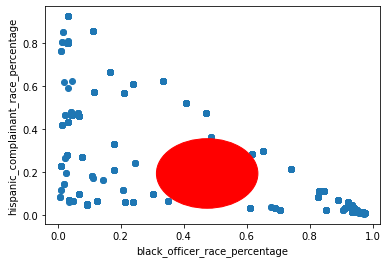

In [ ]:
# plt.scatter(officer, complainant)
circle1 = plt.Circle((0.4745335168673034, 0.19422235088111595),0.16118904844491777, color='r')
fig, ax = plt.subplots() 
ax.add_artist(circle1)
ax.scatter(officer, complainant)
ax.set_xlabel('black_officer_race_percentage')
ax.set_ylabel('hispanic_complainant_race_percentage')

In [ ]:
i = 0
ans = []
while i < 50000:
  x = np.random.random() 
  y = np.random.uniform(low=0, high=1-x)
  r = np.random.uniform(low=0.1, high=0.5)
  count = 0
  # print(r)
  for j in range(len(officer)):
    aa = (x - officer[j])**2 + (y - complainant[j])**2
    # print(aa)
    if ((x - officer[j])**2 + (y - complainant[j])**2) < r**2:
      count = count + 1
  if count == 0:
    # print(x,y,r)
    res = [x,y,r]
    ans.append(res)
  i = i + 1

In [ ]:
len(ans)

384

In [ ]:
rr = []
for i in range(len(ans)):
  rrr = ans[i][2]
  rr.append(rrr)
rr = np.array(rr)
index_max = np.argmax(rr)
print(index_max)

144


In [ ]:
ans[index_max]

[0.4745335168673034, 0.19422235088111595, 0.16118904844491777]

White officer and Hispanic complainant

Text(0, 0.5, 'hispanic_complainant_race_percentage')

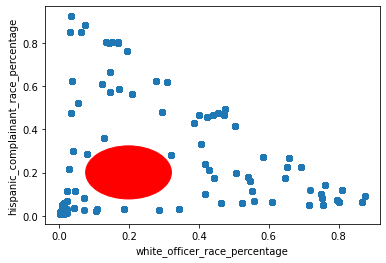

In [ ]:
df_white = df_new.filter(df_new.officer_race == 'White')
df_white_His = df_white.filter(df_white.complainant_race == 'Hispanic')

import matplotlib.pyplot as plt
officer = np.array(df_white_His.select('officer_race_percentage').collect())
complainant = np.array(df_white_His.select('complainant_race_percentage').collect())

circle1 = plt.Circle((0.1988800127987711, 0.20136535451515883),0.12261865724430039, color='r')
fig, ax = plt.subplots() 
ax.add_artist(circle1)
ax.scatter(officer, complainant)
ax.set_xlabel('white_officer_race_percentage')
ax.set_ylabel('hispanic_complainant_race_percentage')

In [ ]:
i = 0
ans = []
while i < 10000:
  x = np.random.random() 
  y = np.random.uniform(low=0, high=1-x)
  r = np.random.uniform(low=0.05, high=0.3)
  count = 0
  # print(r)
  for j in range(len(officer)):
    aa = (x - officer[j])**2 + (y - complainant[j])**2
    # print(aa)
    if ((x - officer[j])**2 + (y - complainant[j])**2) < r**2:
      count = count + 1
  if count == 0:
    # print(x,y,r)
    res = [x,y,r]
    ans.append(res)
  i = i + 1

In [ ]:
rr = []
for i in range(len(ans)):
  rrr = ans[i][2]
  rr.append(rrr)
rr = np.array(rr)
index_max = np.argmax(rr)
print(index_max)
ans[index_max]

173


[0.9961336000227772, 0.0002357541290102483, 0.14204683219575276]

In [ ]:
ll = np.argpartition(rr, -10)[-10:]
ll

array([293, 385,   9, 193, 357, 407,  59, 233,  51, 173])

In [ ]:
ans[407]

[0.1988800127987711, 0.20136535451515883, 0.12261865724430039]

White officer and Black complainant

Text(0, 0.5, 'black_complainant_race_percentage')

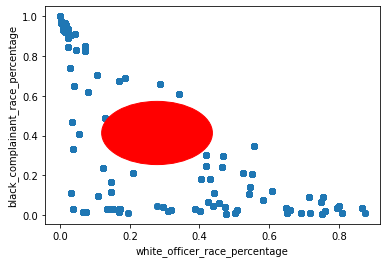

In [ ]:
df_white = df_new.filter(df_new.officer_race == 'White')
df_white_Bla = df_white.filter(df_white.complainant_race == 'Black')

import matplotlib.pyplot as plt
officer = np.array(df_white_Bla.select('officer_race_percentage').collect())
complainant = np.array(df_white_Bla.select('complainant_race_percentage').collect())

# plt.scatter(officer, complainant)

circle1 = plt.Circle((0.27809334851125145, 0.41320724721289553),0.15901940624458183, color='r')
fig, ax = plt.subplots() 
ax.add_artist(circle1)
ax.scatter(officer, complainant)
ax.set_xlabel('white_officer_race_percentage')
ax.set_ylabel('black_complainant_race_percentage')

In [ ]:
i = 0
ans = []
while i < 10000:
  x = np.random.random() 
  y = np.random.uniform(low=0, high=1-x)
  r = np.random.uniform(low=0.05, high=0.3)
  count = 0
  # print(r)
  for j in range(len(officer)):
    aa = (x - officer[j])**2 + (y - complainant[j])**2
    # print(aa)
    if ((x - officer[j])**2 + (y - complainant[j])**2) < r**2:
      count = count + 1
  if count == 0:
    # print(x,y,r)
    res = [x,y,r]
    ans.append(res)
  i = i + 1

In [ ]:
rr = []
for i in range(len(ans)):
  rrr = ans[i][2]
  rr.append(rrr)
rr = np.array(rr)
index_max = np.argmax(rr)
print(index_max)
ans[index_max]

ll = np.argpartition(rr, -10)[-10:]
ll

240


array([181, 567, 240, 523, 382, 320, 782, 509, 772,  57])

In [ ]:
ans[772]

[0.27809334851125145, 0.41320724721289553, 0.15901940624458183]

Black officer and White complainant

Text(0, 0.5, 'white_complainant_race_percentage')

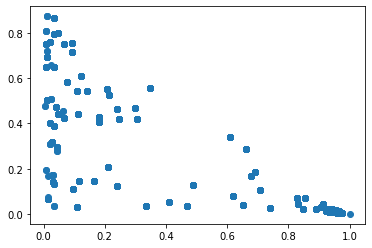

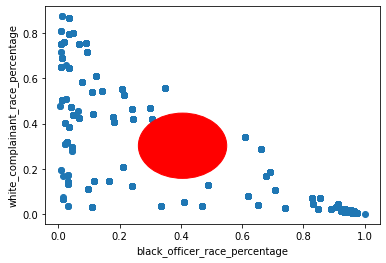

In [ ]:
df_black = df_new.filter(df_new.officer_race == 'Black')
df_black_whi = df_black.filter(df_black.complainant_race == 'White')

import matplotlib.pyplot as plt
officer = np.array(df_black_whi.select('officer_race_percentage').collect())
complainant = np.array(df_black_whi.select('complainant_race_percentage').collect())

plt.scatter(officer, complainant)

circle1 = plt.Circle((0.4053408768839776, 0.30190895999209516),0.1443267564985935, color='r')
fig, ax = plt.subplots() 
ax.add_artist(circle1)
ax.scatter(officer, complainant)
ax.set_xlabel('black_officer_race_percentage')
ax.set_ylabel('white_complainant_race_percentage')

In [ ]:
i = 0
ans = []
while i < 5000:
  x = np.random.random() 
  y = np.random.uniform(low=0, high=1-x)
  r = np.random.uniform(low=0.05, high=0.3)
  count = 0
  # print(r)
  for j in range(len(officer)):
    aa = (x - officer[j])**2 + (y - complainant[j])**2
    # print(aa)
    if ((x - officer[j])**2 + (y - complainant[j])**2) < r**2:
      count = count + 1
  if count == 0:
    # print(x,y,r)
    res = [x,y,r]
    ans.append(res)
  i = i + 1

In [ ]:
rr = []
for i in range(len(ans)):
  rrr = ans[i][2]
  rr.append(rrr)
rr = np.array(rr)
index_max = np.argmax(rr)
print(index_max)
ans[index_max]

ll = np.argpartition(rr, -10)[-10:]
ll

34


array([239, 281, 236,  66, 211,  34, 248,  98, 105,  56])

In [ ]:
ans[56]

[0.4053408768839776, 0.30190895999209516, 0.1443267564985935]

Hispanic officer and white complainant

Text(0, 0.5, 'white_complainant_race_percentage')

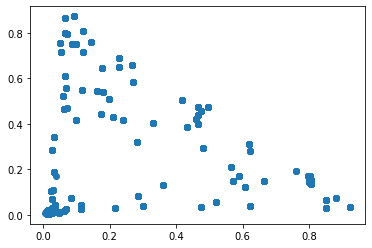

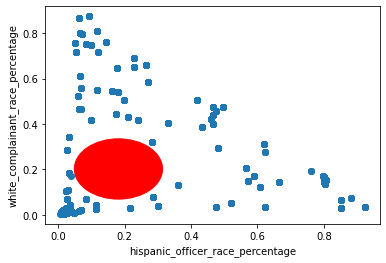

In [ ]:
df_his = df_new.filter(df_new.officer_race == 'Hispanic')
df_his_white = df_his.filter(df_his.complainant_race == 'White')

import matplotlib.pyplot as plt
officer = np.array(df_his_white.select('officer_race_percentage').collect())
complainant = np.array(df_his_white.select('complainant_race_percentage').collect())

plt.scatter(officer, complainant)

circle1 = plt.Circle((0.18163253738740137, 0.2018338245736842),0.13279818840816976, color='r')
fig, ax = plt.subplots() 
ax.add_artist(circle1)
ax.scatter(officer, complainant)
ax.set_xlabel('hispanic_officer_race_percentage')
ax.set_ylabel('white_complainant_race_percentage')

In [ ]:
i = 0
ans = []
while i < 5000:
  x = np.random.random() 
  y = np.random.uniform(low=0, high=1-x)
  r = np.random.uniform(low=0.05, high=0.3)
  count = 0
  # print(r)
  for j in range(len(officer)):
    aa = (x - officer[j])**2 + (y - complainant[j])**2
    # print(aa)
    if ((x - officer[j])**2 + (y - complainant[j])**2) < r**2:
      count = count + 1
  if count == 0:
    # print(x,y,r)
    res = [x,y,r]
    ans.append(res)
  i = i + 1

In [ ]:
rr = []
for i in range(len(ans)):
  rrr = ans[i][2]
  rr.append(rrr)
rr = np.array(rr)
index_max = np.argmax(rr)
print(index_max)
ans[index_max]

ll = np.argpartition(rr, -10)[-10:]
ll

152


array([ 28,  36,  76,  21,  81, 152, 104,  29, 117, 105])

In [ ]:
ans[152]

[0.18163253738740137, 0.2018338245736842, 0.13279818840816976]

Hispanic officer and black complainant

Text(0, 0.5, 'black_complainant_race_percentage')

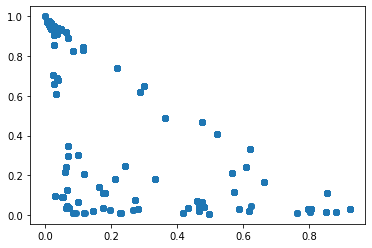

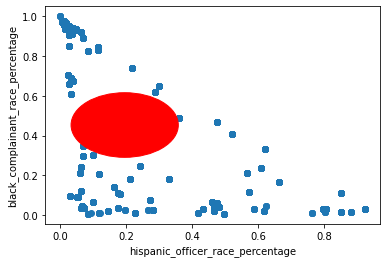

In [ ]:
df_his = df_new.filter(df_new.officer_race == 'Hispanic')
df_his_black = df_his.filter(df_his.complainant_race == 'Black')

import matplotlib.pyplot as plt
officer = np.array(df_his_black.select('officer_race_percentage').collect())
complainant = np.array(df_his_black.select('complainant_race_percentage').collect())

plt.scatter(officer, complainant)

circle1 = plt.Circle((0.19546034456937667, 0.45331176652860394), 0.16253901485980182, color='r')
fig, ax = plt.subplots() 
ax.add_artist(circle1)
ax.scatter(officer, complainant)
ax.set_xlabel('hispanic_officer_race_percentage')
ax.set_ylabel('black_complainant_race_percentage')

In [ ]:
i = 0
ans = []
while i < 5000:
  x = np.random.random() 
  y = np.random.uniform(low=0, high=1-x)
  r = np.random.uniform(low=0.05, high=0.3)
  count = 0
  # print(r)
  for j in range(len(officer)):
    aa = (x - officer[j])**2 + (y - complainant[j])**2
    # print(aa)
    if ((x - officer[j])**2 + (y - complainant[j])**2) < r**2:
      count = count + 1
  if count == 0:
    # print(x,y,r)
    res = [x,y,r]
    ans.append(res)
  i = i + 1

In [ ]:
rr = []
for i in range(len(ans)):
  rrr = ans[i][2]
  rr.append(rrr)
rr = np.array(rr)
index_max = np.argmax(rr)
print(index_max)
ans[index_max]

ll = np.argpartition(rr, -10)[-10:]
ll

132


array([234, 137, 250,  11, 132,  36, 159, 103, 266, 214])

In [ ]:
ans[132]

[0.19546034456937667, 0.45331176652860394, 0.16253901485980182]

Together

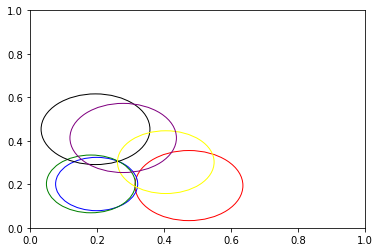

In [ ]:
circle1 = plt.Circle((0.4745335168673034, 0.19422235088111595),0.16118904844491777, color='r',fill=False)
circle2 = plt.Circle((0.1988800127987711, 0.20136535451515883),0.12261865724430039, color='b',fill=False)
circle3 = plt.Circle((0.18163253738740137, 0.2018338245736842),0.13279818840816976, color='g',fill=False)
circle4 = plt.Circle((0.19546034456937667, 0.45331176652860394), 0.16253901485980182, color='black',fill=False)
circle5 = plt.Circle((0.4053408768839776, 0.30190895999209516),0.1443267564985935, color='yellow',fill=False)
circle6 = plt.Circle((0.27809334851125145, 0.41320724721289553),0.15901940624458183, color='purple',fill=False)
fig, ax = plt.subplots() 
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.add_artist(circle5)
ax.add_artist(circle6)